<div style="display: flex; align-items: center; gap: 2px;">
  
  <div style="text-align: left; padding: 0;">
   <h2 style="font-size: 1.8em; margin-bottom: 0;"><b>Fitting data to a Line...</b></h2>
   <br>
   <h3 style=" font-size: 1.2em;margin-bottom: 0;">When the world fits in simple geometry</h3>
   <h3 style="font-size: 1.2em; margin-bottom: 0; color: blue;"><i>Dr. Satadisha Saha Bhowmick</i></h3>
  </div>

  <div style="margin-right: 5px; padding: 0;">
    <img src="images/intro-pic.png" align="right" alt="intro-pic" style="width: 70%;">
    <!-- TEXT NEXT TO IMAGE -->
      <div style="font-size: 0.5em;">
        <p>Woman teaching geometry, from a fourteenth-century edition of Euclid’s geometry book.</p>
      </div>
  </div>

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from ipywidgets import interact
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

bac_data = pd.read_csv("BLOODALC.csv")
bac_data = bac_data[['Beers','BAC']]

##  Week 2: Learning Outcomes
Moving beyond Simple Linear Regression

<div style="display: flex; gap: 2px;">

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Setting the Regression Stage.</li>
    <li class="fragment">Linear Algebra Primer</li>
    <li class="fragment">Orthogonal Projections</li>
    <li class="fragment">Least Squares Solution for Inconsistent Systems</li>
  </ul>

  
  </div>

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Derivation of Normal Equations</li>
    <li class="fragment">Simple Linear Regression</li>
    <li class="fragment">Conditions on Validity of Least Squares Solutions</li>
  </ul>
  </div>

</div>

## First Examples: Readjusting the North American Datum
<div class="fragment">

In 1974, the National Geodetic Survey set out to update the North American Datum (NAD).
- A network of 268000 carefully surveyed and marked reference points that span the entire continent.
- Recorded Latitudes and Longitudes must be determined to a few centimeters.
- Since the last adjustment in 1927, errors had crept in!
</div>

## First Examples

<div style="display: flex; align-items: center; gap: 5px;">

  <div class="fragment"; style="flex: 1;">
    <div class="fragment">
    Measurement data collected over 140 years were converted to a computer readable form and then standardized! Final calculations involved 1.8 million observations.
    </div>
    <div class="fragment">
    The system of equation for had no solution in the ordinary sense but rather a <b><i>least-squares solution</i></b>.
    <ul>
        <li> Assigned latitude and longitude to reference points in a way that corresponded best to the 1.8 million observations, i.e. minimal deviation.</li>
        <li> Was found by solving a related linear system of <u style="color: blue; font-size: 1.0em; font-weight: bold;">normal equations</u> that involved 928,375 variables!</li>
        <li> Largest least-squares problem ever solved.</li>
    </ul>
    </div>

  </div>

  <div  style="flex: 1;">
    <img src="images/NAD.png" alt="NAD" scale="0.45;" style="width: 90%;">
  </div>
</div>

## Motivating Example : Beers and BAC
We will use a much simple example to set the premise for linear equations and Simple Linear Regression.

<div class="fragment" style="
    border: 4px solid #3b82f6;
    background: #eef6ff;
    padding: 10px 15px;
    border-radius: 6px;
    margin: 10px auto;
    width: 90%;
    box-sizing: border-box;
    font-size: 1.2em;
    line-height: 1.35;
    color: #1e40af;">
  
  Researchers at Ohio State University had sixteen volunteers drink a randomly drawn number of 12 ounce beer cans. Thirty minutes after drinking their last beer, each subject had their blood alcohol content (BAC) measured. We want to test the relationship between <b>BAC</b> and the <b>number of beer cans</b> that each subject drank.

</div>

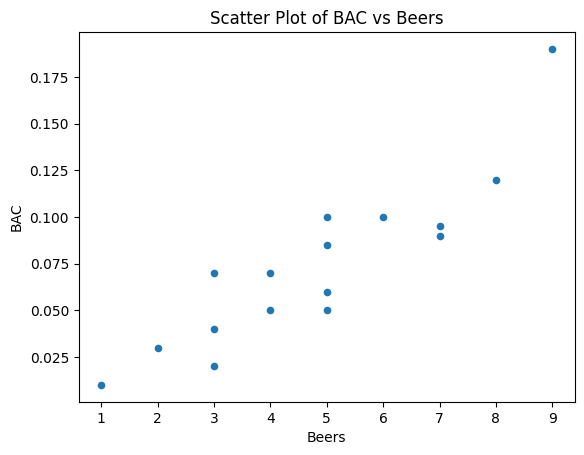

In [2]:
bac_data.plot.scatter( x='Beers', y='BAC',title='Scatter Plot of BAC vs Beers')
plt.show()

### Motivating Example : Beers and BAC

- In a perfect world, we would be able to predict someone’s BAC just by knowing the number of beers they drank using a linear equation.
- However, there are very few times when such linear relationships are perfect. 
- Rather than finding an exact solution, we typically want to find something that is close enough (an approximate solution).
- Plotting the data shows a general linear trend which is reassuring.

## Setting the Regression Scene

In a class like DATA 119, you might have seen equations like $BAC = \beta_0 + \beta_1 \times Beers$. This a linear equation in two dimensions, representing a line fit.

A few key terms:
- Explanatory Variable: # of Beers; known from our dataset. Also called predictor or feature.
- Response Variable: BAC; what we want to predict
- $\beta_0$ is the intercept of the line that represents the linear relationship between predictor and response. $\beta_1$ is the slope of the line.

### Setting the Regression Scene

Given our dataset, we are trying fit a system of equation that looks something like this:

\begin{aligned}
0.100 &= \beta_0 + \beta_1\times 5\\
0.030 &= \beta_0 + \beta_1\times 2\\
\vdots\\
0.090 &= \beta_0 + \beta_1\times 7\\
0.010 &= \beta_0 + \beta_1\times 1\\
0.050 &= b\beta_0 + \beta_1\times 4
\end{aligned}

### Setting the Regression Scene

When solving systems of equations in a computer using modern computational packages, we always represent them in vectorial form.<br> It suits well given that the theory of the techniques we will discuss in this lecture is also rooted in <u>Linear Algebra and Vector Calculus</u>.

We can re-express the system of linear equations as follows:<br>

\begin{aligned}
A\vec{x}&=\vec{b}\\
\begin{bmatrix}
1 & 5 \\
1 & 2 \\
1 & 9 \\
\vdots \\
1 & 1 \\
1 & 4
\end{bmatrix}
\vec{x}
&=
\begin{bmatrix}
0.100 \\
0.030 \\
0.190\\
\vdots\\
0.010\\
0.050
\end{bmatrix}; \text{where } \vec{x} = \begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
\end{aligned}

Generally speaking, $A\vec{x}$ is a <u style="color: blue; font-size: 1.0em; font-weight: bold;">linear combination</u> of the columns of a matrix $A$. 

Note that we have to inject an extra column of all $\mathcal{\mathbf{1}}$ s alongside the actual feature column to make our matrix operation consistent with the fact that the parameter vector $\vec{x}$ includes a non-zero intercept in most cases of Simple Linear Regression.

### Setting the Regression Scene

- In most practical applications, a system of linear equations, $A\vec{x}=\vec{b}$, representing data from an observational study might not generate a perfect solution - combination of values for elements in $\vec{x}$ such that every equation in the system is satisfied.
- Instead, we wish to find an estimate $\hat{\vec{x}}$ that provides the <u style="color: blue; font-size: 1.0em; font-weight: bold;">best approximation</u> for the output vector $\vec{b}$.

More on this later! First we take a detour to Linear Algebra.

## Linear Algebra Primer

We will cover some necessary concepts and theorems that lead us to obtaining the <b><i>least-squares solution</i></b> for the approximation problem discussed before.

<b>Pre-requisites</b>: To keep up with this material, you should also be aware of the following concepts.

<div style="display: flex; gap: 2px;">

  <div style="flex: 1;">
  <ul>
    <li class="fragment">Linear combination of columns of a matrix</li>
    <li class="fragment"><u style="color: blue; font-size: 1.0em; font-weight: bold;">Span and Basis</u></li>
    <li class="fragment"><u style="color: blue; font-size: 1.0em; font-weight: bold;">Subspaces</u></li>
    <li class="fragment">Linear Independence and Dependence</li>
  </ul>

  
  </div>

  <div style="flex: 1;">
  <ul>
    <li class="fragment"><u style="color: blue; font-size: 1.0em; font-weight: bold;">Null Space</u></li>
    <li class="fragment"><u style="color: blue; font-size: 1.0em; font-weight: bold;">Row Space</u> and <u style="color: blue; font-size: 1.0em; font-weight: bold;">Column Space</u></li>
    <li class="fragment">Rank of a Matrix</li>
    <li class="fragment">Reduced Row Echelon Form</u> to solve a Linear System of Equations</li>
  </ul>
  </div>

</div>

<span class="fragment">

Going forward, all the concepts and ideas we discuss will feature in an $n$ dimensional real-space $\mathcal{R}^n$.<br> We also adopt the convention of representing vectors as column vectors.
</span>

### Dot Product

If $u$ and $v$ are vectors in $\mathcal{R}^n$, then the <u style="color: blue; font-size: 1.0em; font-weight: bold;">inner product</u> or <u style="color: blue; font-size: 1.0em; font-weight: bold;">dot product</u> of these two vectors is given by: 
$$\begin{aligned}
\vec{u}\cdot \vec{v} &= \vec{u}^T\vec{v}\\
\vec{u}\cdot \vec{v} &= [u_1 u_2 \ldots u_n] \begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix} = u_1v_1 + u_2v_2 + \ldots + u_nv_n
\end{aligned}$$

The dot product is a scalar value.


### Dot Product : Properties

$\vec{u}\cdot \vec{v} = \vec{v} \cdot \vec{u}$

$(\vec{u}+\vec{v})\cdot \vec{w} = \vec{u} \cdot \vec{w} + \vec{v} \cdot \vec{w}$

For a scalar $c$, $(c\vec{u})\cdot \vec{v} = c(\vec{u}\cdot \vec{v}) = \vec{u}\cdot (c\vec{v})$

$\vec{u}\cdot \vec{u} \geq 0$ and $\vec{u}\cdot \vec{u} = 0$ if and only if $\vec{u}$=0

Putting it all together: $(c_1\vec{u_1}+c_2\vec{u_2}+ \ldots+ c_p\vec{u_p})\cdot w = c_1(\vec{u_1}\cdot \vec{w})+c_2(\vec{u_2}\cdot \vec{w})+\ldots+c_p(\vec{u_p}\cdot \vec{w})$

### Dot Product : Key Results

- <b>Length of a vector</b> or <b>Norm</b>: $\| \vec{v} \| = \sqrt{\vec{v}\cdot \vec{v}} = \sqrt{v_1^2+v_2^2+\ldots+v_n^2}$.<br> <u style="color: blue; font-size: 1.0em; font-weight: bold;">Unit Vectors</u> are vectors of length $=1$.
- <b>Orthogonal vectors</b>: Two vectors $\vec{u}$ and $\vec{v}$ are orthogonal if $\vec{u} \cdot \vec{v}=0$
- <b>Distance</b>: Distance between two vectors $\vec{u}$ and $\vec{v}$ is $ \| \vec{u}-\vec{v} \| $
- <b>Pythagorean Theorem</b>: Two vectors $\vec{u}$ and $\vec{v}$ are orthogonal if and only if $ \| \vec{u}+\vec{v} \|^2 = \| \vec{u} \|^2+\| \vec{v} \|^2 $


### Orthogonal Complements

<style>
.no-border table, 
.no-border th, 
.no-border td {
  border: none !important;
}
.text-col {
  font-size: 1.4em !important;
  line-height: 1.5;
}
</style>

<div class="no-border">

|  |  |
|---|---|
| If a vector $\vec{z}$ is orthogonal to every vector in $W$, a subspace in $\mathcal{R}^n$, then $\vec{z}$ is <u style="color: blue; font-size: 1.0em; font-weight: bold;">orthogonal</u> to $W$.<br><br> <u style="color: blue; font-size: 1.0em; font-weight: bold;">Note</u>: If a vector is orthogonal to a set of vectors, it is also orthogonal to any linear combination of them.<br><br>Let $W$ be a subspace. Its orthogonal complement is the <u style="color: blue; font-size: 1.0em; font-weight: bold;">subspace</u> in $\mathcal{R}^n$ denoted by $W^\perp$ that contains the set of all vectors $\vec{z}$ that are orthogonal to $W$. <br> Here we have a subspace that is a plane in $\mathcal{R}^3$ and a line $L$ through the origin.<br> $L = W^\perp$ and $W = L^\perp$.| <img src="images/orthogonal-complements-in-r3.webp" style="width: 90%;"> |

</div>



<span class="fragment">
<u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">Your Turn</u><br>
Does the line need to pass through the origin for it to be the orthogonal complement of this plane?
</span>

### Relationship to Null Spaces

<div style="display: flex; align-items: center; gap: 5px;">

  <div style="flex: 1;">
    <p>Let $A$ be an $m \times n$ matrix</p>
    <p>
    Any such matrix is associated with, what we call, <u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">four fundamental subspaces</u> connected by the <u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">Fundamental Theorem of Linear Algebra</u>.</p>
    <ul>
    <li>The row space of $A$ is the orthogonal complement to the null space of $A$: $(Row A)^\perp = Nul A$</li>
    <li>The column space of $A$ is the orthogonal complement to the null space of $A^T$: $(Col A)^\perp = Nul A^T$</li>
    </ul>
  </div>

  <div style="flex: 1;">
    <img src="images/four-subspaces.png" alt="Four Subspaces" scale="0.55;" style="width: 90%;">
  </div>
</div>


We will not prove this in class but [here](https://www.khanacademy.org/math/linear-algebra/alternate-bases/othogonal-complements/v/linear-algebra-orthogonal-complements) is a great explanation of this theorem that explores the proof.



### Orthogonal Projection

<div style="display: flex; align-items: center; gap: 5px;">

  <div style="flex: 1;">
    <p>Let us take two non-zero vectors $\vec{u}$ and $\vec{v}$ in $\mathcal{R}^n$.</p>
    <p>Consider the problem of <u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">decomposing</u> $\vec{v}$ into the sum of two vectors, one a multiple of $\vec{u}$ and the other that is orthogonal to $\vec{u}$. The former is called the <b>orthogonal projection of $\vec{v}$ onto $\vec{u}$</b> and the other is the component of $\vec{v}$ <b>orthogonal to</b> $\vec{u}$.<br>
    $\vec{v}= proj_{\vec{u}}(\vec{v}) + \vec{z}$
    </p>
    <p>Let $proj_{\vec{u}}(\vec{v}) = \alpha\vec{u}$ and $\vec{z} \perp \vec{u}$. This implies</p>
    <div>
    \begin{aligned}
    0 &= (\vec{v}-\alpha\vec{u})\cdot \vec{u} = \vec{v}\cdot \vec{u} - \alpha(\vec{u}\cdot \vec{u})\\
    \implies \alpha &= \frac{\vec{v}\cdot \vec{u}}{\vec{u}\cdot \vec{u}}\\
    \implies proj_\mathbf{\vec{u}}(\vec{\mathbf{v}}) &= \frac{\vec{v}\cdot \vec{u}}{\vec{u}\cdot \vec{u}} \vec{u} \text{ and } \vec{z} = \vec{v}-\frac{\vec{v}\cdot \vec{u}}{\vec{u}\cdot \vec{u}} \vec{u}
    \end{aligned}
    </div>

  </div>

  <div style="flex: 1;">
    <img src="images/orthogonal-projection.png" alt="Orthogonal Projection" scale="0.55;" style="width: 90%;">
  </div>
</div>




### Extending the idea to subspaces

Given a vector $\vec{v}$ and a subspace $W$ in $\mathcal{R}^n$, there is a vector in $W$ denoted by $proj_{\vec{u}}(\vec{v})$, such that:
1. $proj_{\vec{u}}(\vec{v})$ is a <u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">unique</u> vector in $W$ for which $\vec{z} = \vec{v}-proj_{\vec{u}}(\vec{v})$ is <b>orthogonal</b> to $W$.
    - $proj_{\vec{u}}(\vec{v})$ is <b>orthogonal projection of $\vec{v}$ onto $W$</b>
    - In three dimension, think of dropping a perpendicular from any point in space onto a plane through the origin.
2. $proj_{\vec{u}}(\vec{v})$ is the <u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">unique</u> vector <u style="color: blue; font-size: 1.0em; font-weight: bold; font-style: italic;">closest</u> in $W$ to $\vec{v}$.
    - We will prove this shortly.
3. <b><u>Orthogonal Decomposition Theorem</u></b>: $\vec{v}$ can be written <b>uniquely</b> in the form:  $\vec{v}= proj_{\vec{u}}(\vec{v})+\vec{z}$

### Best Approximation Theorem

<div class="fragment" style="
    border: 4px solid #3b82f6;
    background: #eef6ff;
    padding: 10px 15px;
    border-radius: 6px;
    margin: 10px auto;
    width: 90%;
    box-sizing: border-box;
    font-size: 1.2em;
    line-height: 1.35;
    color: #1e40af;">

Let $W$ be a subspace of $\mathcal{R}^n$ and $\vec{y}$ be any vector in it. Let $proj_{\vec{u}}(\vec{y})$ be the <b>orthogonal projection of $\vec{y}$ onto $W$</b>. Then $proj_{\vec{u}}(\vec{y})$ is the closest point to $\vec{y}$ in $W$:
$$
\| \vec{y}-proj_{\vec{u}}(\vec{y}) \| < \| \vec{y}-\vec{v} \|
$$
for all $\vec{v}$ in $W$ distinct from $proj_{\vec{u}}(\vec{y})$. In other words, $proj_{\vec{u}}(\vec{y})$ is the <b>best approximation</b> to $\vec{y}$ in $W$.
</div>

### Best Approximation Theorem: Proof

<div style="display: flex; align-items: center; gap: 5px;">

  <div style="flex: 1;">
    <p>To minimize typing, I'll refer to the orthogonal projection $proj_{\vec{u}}(\vec{y})$ as $\mathbf{\hat{y}}$ in this proof.</p>
    <p>Take $\vec{v}$ in W distinct from $\hat{y}$. Then $\hat{y}-\vec{v}$ is in $W$. (<b>Why?</b>)<br>
    $\vec{y}-\hat{y}$ is orthogonal to $W$ by definition, and therefore to $\hat{y}-\vec{v}$ as well.
    </p>
    <p>$\vec{y}-\vec{v} = (\vec{y}-\hat{y}) + (\hat{y}-\vec{v})$<br>
    By the Pythagorean theorem,
    $$
    \| \vec{y}-\vec{v} \|^2 = \| \vec{y}-\hat{y} \|^2 + \| \hat{y}-\vec{v} \|^2
    $$
    </p>
    <div>Given $\hat{y}$ and $\vec{v}$ are distinct, $\| \hat{y}-\vec{v} \| > 0$ which proves $\| \vec{y}-\hat{y} \|< \| \vec{y}-\vec{v} \|$.<br>
    Or, $\| \vec{y}-proj_{\vec{u}}(\vec{y}) \|< \| \vec{y}-\vec{v} \|$
    </div>

  </div>

  <div style="flex: 1;">
    <img src="images/best-approximation.png" alt="Best Approximation Theorem" scale="0.55;" style="width: 90%;">
  </div>
</div>

## Least Squares Problem for Inconsistent Systems

We motivated this discussion at the start by showing some practical examples that required solving a system of equations $A\vec{x}=\vec{b}$ formed by data collected in observational studies.
Problem is such data can often lead to <b>inconsistent systems</b> where an exact solution is demanded but does not exist.<br>
The best we can do is $A\hat{x}$, an approximation $\vec{b}$, where the smaller the distance between this approximation and $\vec{b}$, the better it is.

$\color{blue}{\textbf{General Least Squares Problem}}$: Find an $\hat{x} \in \mathcal{R}^n$ that <b><u>minimizes</u></b> $\| \vec{b}-A\hat{x} \|$.<br>
The adjective “least-squares” arises from the fact that $\| \vec{b}-A\hat{x} \|$ is the square root of a sum of squares.

### Least Squares Solution 

<div class="fragment" style="
    border: 4px solid #3b82f6;
    background: #eef6ff;
    padding: 10px 15px;
    border-radius: 6px;
    margin: 10px auto;
    width: 90%;
    box-sizing: border-box;
    font-size: 1.0em;
    line-height: 1.35;
    color: #1e40af;">

If $A$ is an $m \times n$ matrix and $\vec{b}$ is in $\mathcal{R}^m$, a <b>least-squares solution</b> of $A\vec{x}=\vec{b}$ is an $\hat{x} \in \mathcal{R}^n$ such that
$$
\| \vec{b}-A\hat{x} \| < \| \vec{b}-A\vec{x} \|
$$
for all $\vec{x}$ in $\mathcal{R}^n$.
</div>

<span class="fragment">
Note that, whatever $\vec{x}$ we pick, the vector $A\vec{x}$ will <b>always</b> be in the column space of $A$, i.e., a linear combination of the columns of A. This is ideal when we apply this idea to Linear Regression.<br>
Since columns of $A$ are vectors in $\mathcal{R}^m$, the column space is also a subspace of $\mathcal{R}^m$.<br> <b>Pay attention</b> to the dimensions across all these transformations!
</span>

### Derivation of Normal Equations

Drop the orthogonal projection of $\vec{b}$ on to the subspace $Col A$: $\hat{b} = proj_{Col A}b$. Since, $\hat{b}$ is in the column space of $A$, the equation $A\vec{x}=\hat{b}$ will be consistent. In other words, there is an estimate $\hat{x} \in \mathcal{R}^n$ such that: $A\hat{x} = \hat{b}$.


As shown before, the orthogonal projection <b>will be</b> the best approximation of $\vec{b}$ in $Col A$.<br> The vector $\hat{x}$ is a least squares solution of $A\vec{x} = \vec{b}$ <b>if and only if</b> it satisfies the equation above.<br>
Assuming such a solution exists, we can use the Orthogonal Decomposition Theorem to suggest that $\vec{b}-A\hat{x}$ is orthogonal to the $ColA$, and in turn, every vector in $ColA$ including each of the columns of $A$.

If $a_j$ is the $j$-th column of $A$, then: $a_j \cdot (\vec{b}-A\hat{x}) = a_j^T(\vec{b}-A\hat{x}) = 0$. Since each $a_j^T$ is a row of the matrix $A^T$, it follows:
$$
A^T(\vec{b}-A\hat{x}) = \mathbf{0}
$$
$$
\mathbf{A^TA\hat{x} = A^T\vec{b}} \rightarrow \color{blue}{\textbf{Normal Equations}}$$



### Least Squares Solutions

- The set of least-squares solutions of $A\vec{x}=\vec{b}$ coincides with the nonempty set of solutions of the normal equations.
- $(\vec{b}-A\hat{x}) $ is the <b>error</b> of the least squares approximation. In Linear Regression terminology this is known as the <b><i>residual</i></b>.<br> It follows from the Fundamental Theorem of Linear Algebra that the residual, being orthogonal to the $Col A$, <b><u>lies in the null space of $A^T$</u></b>.

<div align="right">
    <img src="images/least-squares-soln.png" alt="Least Squares Soln" scale="0.35;" style="width: 50%;">
</div>


### Conditions on a Least Squares Solution

Let $A$ be an $m \times n$ matrix. The following statements are logically equivalent:
- The columns of $A$ are linearly independent.
- The matrix $A^TA$ is non-singular (non-zero determinant) and therefore invertible.

In such a case, the equation $A\vec{x}=\vec{b}$ has a <b>unique</b> least-squares solution for each $\vec{b} \in \mathcal{R}^m$. The least squares solution $\hat{x}$ is given by $\mathbf{\color{blue}{\hat{x} = (A^TA)^{-1}A^T\vec{b}}}$

This formula is mainly for theoretical purposes and we rarely solve for least squares solutions directly from the normal equations.

### Least Squares Example 1:

Find the Least Squares solution and error of the inconsistent system $A\vec{x}=\vec{b}$ for 
$$
A= \begin{bmatrix}
4 & 0 \\
0 & 2 \\
1 & 1
\end{bmatrix}, 
\vec{b}= \begin{bmatrix}
2 \\
0 \\
11
\end{bmatrix}
$$

### Least Squares Example 2:

Find a Least Squares solution of the inconsistent system $A\vec{x}=\vec{b}$  for 
$$
A= \begin{bmatrix}
1 & 1 & 0 & 0\\
1 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 1
\end{bmatrix}, 
\vec{b}= \begin{bmatrix}
-3 \\
-1 \\
0 \\
2 \\
5 \\
1
\end{bmatrix}
$$

Should be of the form
$$
\hat{x} = \begin{bmatrix}
3 \\
-5 \\
-2 \\
0
\end{bmatrix} + x_4 \begin{bmatrix}
-1\\
1\\
1\\
1
\end{bmatrix}
$$

<b>Overdetermined System</b> $\rightarrow$ more examples than unknowns

## General Linear Model

Let's do a quick change of notation from $A\vec{x}=\vec{b}$ to be consistent with what we will see more of in upcoming lectures.

The equation for Simple Linear Regression is given by $\mathbf{\color{blue}{X\vec{\beta}=\vec{y}}}$
- The <b>design matrix</b> $X$ specifies the linear model, i.e., which feature variables or predictors are included in the study.
- The <b>parameter vector</b> $\vec{\beta}$ specifies the fitted model parameters.
    - The estimate of best fit $\hat{\beta}$ is a solution to the normal equations: $\mathbf{\color{blue}{X^TX\beta = X^Ty}}$.
    - Also called the least squares solution, $\hat{\beta} = (X^TX)^{-1}X^T\vec{y}$.
    - $(X^TX)^{-1}X^T$ is sometimes called the "hat" matrix.
- The <b>observation vector</b> $\vec{y}$ contains the observed responses.

### Least Squares Line

- In two dimensions, one feature and one intercept, the model we fit is a $\color{blue}{\textbf{least squares line}}$.
    - Line of Regression: $y = \beta_0 + \beta_1x$
    - The predicted value $\hat{y}_i = \beta_0 + \beta_1x_i$
- The coefficients $\beta_0$ and $\beta_1$ are the intercept and slope of the line. They are also our <b>regression coefficients</b>.
- The residual vector $\vec{e}=\vec{y}-X\vec{\beta}$ is orthogonal to the feature space.
    - An individual residual is the difference between a prediction and an observed response: $e_i = y_i-\hat{y}_i$

<span>
<h4 style="color: blue; font-weight: bold; font-style: italic;">Your Turn</h4>

Show that the residual vector $\vec{e}$ is orthogonal to the column space of the design matrix $X$
</span>

<details>
<summary>Click after solving</summary>

We know from the normal equations $X^TX\vec{b}=X^T\vec{y}$ <u>and</u> $\vec{e} = \vec{y}-X\vec{b}$<br>
$X^T\vec{e} = X^T(\vec{y}-X\vec{b}) = X^T\vec{y}-X^TX\vec{b}$<br>
$\implies =X^T\vec{y}-X^T\vec{y} = 0$

</details>


In [3]:
# Fit the linear regression model
model = LinearRegression()
model.fit(bac_data[['Beers']], bac_data['BAC'])

# Make predictions
y_pred = model.predict(bac_data[['Beers']])

# Calculate residuals
residuals = bac_data['BAC'] - y_pred

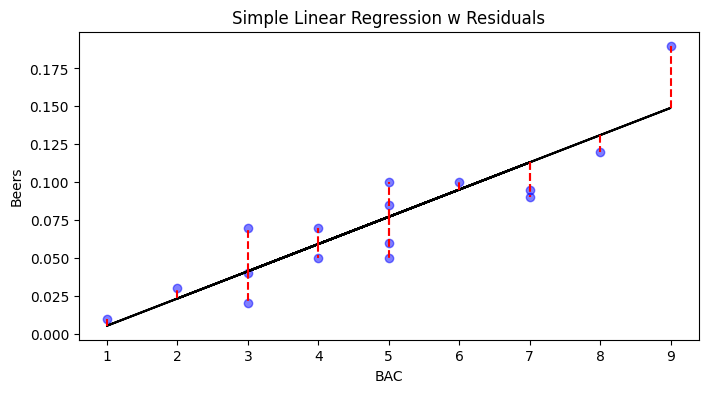

In [4]:
# Plot the fitted line
plt.figure(figsize=(8, 4))
plt.scatter(bac_data['Beers'], bac_data['BAC'], color='blue', alpha=0.5)
plt.plot(bac_data['Beers'], y_pred, color='k')

# Plot the residuals as vertical lines
plt.vlines(bac_data['Beers'], y_pred, bac_data['BAC'], colors='red', linestyle='--', label='Residuals')


plt.xlabel('BAC')
plt.ylabel('Beers')
plt.title('Simple Linear Regression w Residuals')
plt.show()

### Key Properties

For simple linear regression we have, $X\vec{\beta}=\vec{y}$
$$\begin{aligned}
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots \\
1 & x_n
\end{bmatrix} \begin{bmatrix}
\beta_0\\
\beta_1
\end{bmatrix} &= \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}\\
\text{Passing these to the normal equation we get,}
\begin{bmatrix}
n & \sum_{i=1}^n x_n \\
\sum_{i=1}^n x_n & \sum_{i=1}^n x^2_n \\
\end{bmatrix} \begin{bmatrix}
\beta_0\\
\beta_1
\end{bmatrix} &=  \begin{bmatrix}
\sum_{i=1}^n y_n\\
\sum_{i=1}^n x_iy_i
\end{bmatrix}\\
\text{with } \bar{x} \text{ and } \bar{y} \text{ as sample means we can write this as,}\\
\begin{bmatrix}
n & n\bar{x} \\
n\bar{x} & \sum_{i=1}^n x^2_n \\
\end{bmatrix} \begin{bmatrix}
\beta_0\\
\beta_1
\end{bmatrix} &=  \begin{bmatrix}
n\bar{y}\\
\sum_{i=1}^n x_iy_i
\end{bmatrix}
\end{aligned}$$

### Key Properties

Although we can solve the equation from here onwards, centering the data in $X$ about the mean $\bar{x}$ simplifies things further.
As the design matrix becomes $$\begin{bmatrix}
1 & x_1-\bar{x} \\
1 & x_2-\bar{x} \\
\vdots \\
1 & x_n-\bar{x}
\end{bmatrix} \text{, our equation becomes,}$$
$$\begin{aligned}
\begin{bmatrix}
n & 0 \\
0 & \sum_{i=1}^n (x_n - \bar{x})^2 \\
\end{bmatrix} \begin{bmatrix}
\beta_0\\
\beta_1
\end{bmatrix} &=  \begin{bmatrix}
n\bar{y}\\
\sum_{i=1}^n (x_i-\bar{x})y_i
\end{bmatrix}\\
\underbrace{\begin{bmatrix}
n & 0 \\
0 & \sum_{i=1}^n \sigma_X^2 \\
\end{bmatrix}}_{\text{a diagonal matrix }} \begin{bmatrix}
\beta_0\\
\beta_1
\end{bmatrix} &=  \begin{bmatrix}
n\bar{y}\\
\sum_{i=1}^n (x_i-\bar{x})y_i
\end{bmatrix}
\end{aligned}$$

### Key Properties

- Turns out that upon centering $X^TX$ is diagonal. Its columns are orthogonal and all the transformed features are uncorrelated.
- This condition is highly desirable as it makes calculations for regression coefficients numerically stable and simplified!
- In practice we actually standardize our features and response variables. We can test a few things here.
    1. The correlation between the predictor and the response is a <b>standardized comparison</b>, meaning that the raw data correlation and the standardized value correlation are the <b><u>same</u></b>.
    - The slope of the regression line upon standardizing the data is actually the correlation coefficient between $x$ and $y$.
    - Pearson's Correlation coefficient $\mathbf{\color{blue}{r_{xy} = \beta_1 \times \frac{\sigma_y}{\sigma_x}}}$. (You will verify this empirically!)

### Conditions for the validity of a Least Squares Solution

- A least-squares solution <b>always exists</b> for any $X \in \mathcal{R}^{m \times n}$ and $\vec{y} \in \mathcal{R}^{m}$.

- $X^TX$ must be invertible, meaning it must be non-singular. This means columns of the design matrix are independent.
    -  We have an unique (exactly one) solution.

- $X^TX$ is singular and therefore non-invertible. This means columns of the design matrix are dependent.
    - We have infinitely many solutions.
    - From the pov of regression, this indicates perfect multicollinearity. (More on this later!)
        - Note that we still have a solution, just not an unique one.
        - Fitted values $\hat{y}$ are still well-defined but the regression coefficients are not identifiable.

$\color{blue}{\textbf{Key Takeaway}}$: Invertibility is needed for uniqueness, not for existence of a least squares solution. 

### Thats all folks!

<h4><b>For now...</b></h4>

<div style="text-align: center;">
    <img src="images/end-slide.jpg" alt="Linear Regression The End" scale="0.01;" style="width: 40%;">
</div>